In [52]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from utils import config, utils

In [53]:
# Define the target and features
TARGET = "label"
FEATURES = ["text",]

In [54]:
df_tweets = pd.read_csv("../res/prepared/cryptonews.csv")
df_cv = pd.read_csv("../res/prepared/hf-twitter-financial-news.csv")

In [55]:
config.SENTIMENTS = df_tweets[TARGET].unique().tolist()
config.SENTIMENTS

['negative', 'neutral', 'positive']

## Model training

### Pretrained

#### Ollama
Due to poor performance and long execution times, this model will no longer be evaluated. The results can be found in the notebook located at `src/archive/llm-ollama.ipynb`

In [56]:
ollama_model = "llama3.1:latest"

In [57]:
# ollama_pipeline = utils.OllamaPipeline(
#     df=df_tweets,
#     features=FEATURES,
#     target=TARGET,
#     ollama_model=ollama_model,
#     model_name=ollama_model,
# )

In [58]:
# ollama_pipeline.evaluate()

#### Huggingface

In [59]:
# from transformers import pipeline
# import tqdm

# pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

In [60]:
# display(df_tweets["title"], df_tweets["text"])

In [61]:
# y_pred = []

# for idx, row in tqdm.tqdm(df_tweets.iterrows(), desc="Predicting sentiment"):
#     try:
#         result = pipe(
#             #{"text": row["title"], "text_pair": row["text"]},
#             {"text": row["text"]},
#             truncation=True  
#         )
#         y_pred.append(result)
#     except Exception as e:
#         print(idx, "|", e, "|", row["text"])
#         y_pred.append({"label": "N/A"})
    
# df_tweets["y_pred"] = y_pred

In [62]:
# df_tweets.head()

In [63]:
# df_tweets["pred_sentiment"] = df_tweets["y_pred"].apply(lambda x: x["label"])
# df_tweets["pred_sentiment"] = df_tweets["pred_sentiment"].replace({"POS": "positive", "NEU": "neutral", "NEG": "negative"})
# df_tweets.head()

In [64]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# cm = confusion_matrix(df_tweets["sentiment"], df_tweets["pred_sentiment"], labels=config.SENTIMENTS, normalize="true")
# print(cm)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=config.SENTIMENTS)
# disp.plot(cmap=plt.cm.Blues)

### Supervised

#### NLTK-Randomforest

In [65]:
nltk_rf_model = utils.CustomPipeline(
    df_tweets,
    FEATURES,
    TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer()),
                ('tfidf', TfidfVectorizer(tokenizer=None, preprocessor=None))
            ]), feature) for feature in FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf"
)

In [66]:
nltk_rf_model.fit(False)
nltk_rf_model.fit(True)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  41.8s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.8s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  55.1s


,text
0,$BYND - JPMorgan reels in expectations on Beyo...
1,$CCL $RCL - Nomura points to bookings weakness...
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ..."
3,$ESS: BTIG Research cuts to Neutral https://t....
4,$FNKO - Funko slides after Piper Jaffray PT cu...
...,...
11926,Stocks making the biggest moves midday: TD Ame...
11927,Stocks making the biggest moves premarket: Fit...
11928,Stocks making the biggest moves premarket: Hom...
11929,Stocks making the biggest moves premarket: TD ...


0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
11926     neutral
11927     neutral
11928     neutral
11929     neutral
11930     neutral
Name: label, Length: 11931, dtype: object

array(['positive', 'negative', 'negative', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

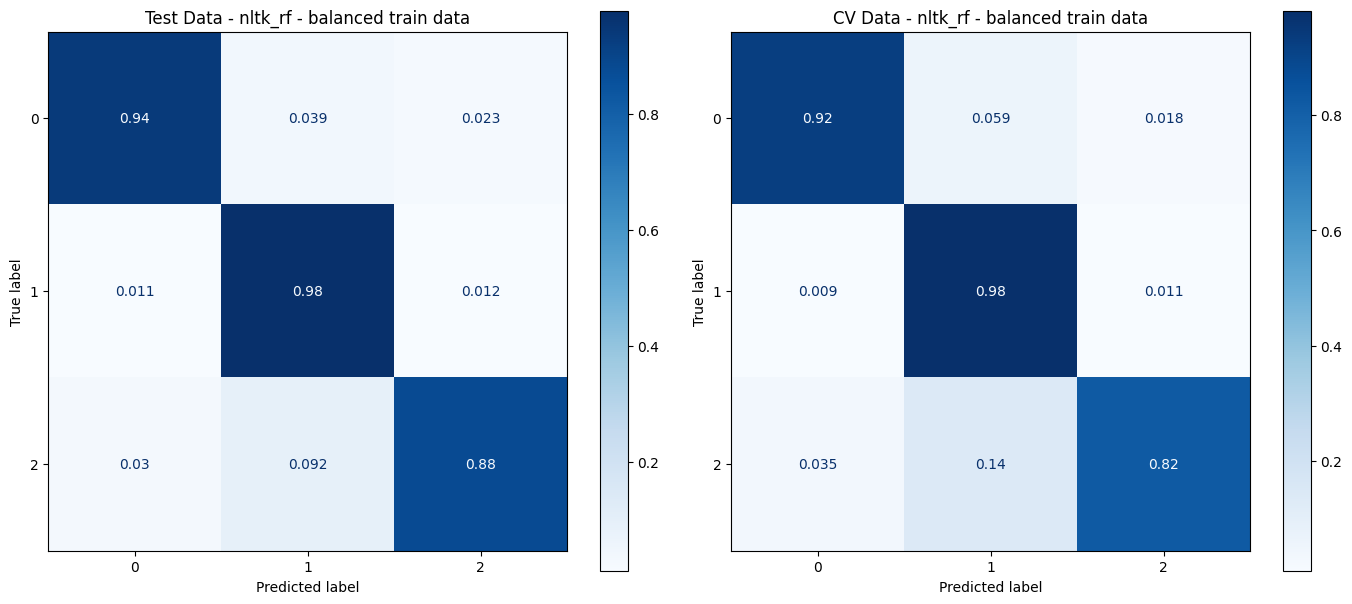

Classification Report for nltk_rf - balanced train data:
              precision    recall  f1-score   support

    negative       0.91      0.94      0.93      1096
     neutral       0.92      0.98      0.95      2844
    positive       0.97      0.88      0.92      2155

    accuracy                           0.94      6095
   macro avg       0.93      0.93      0.93      6095
weighted avg       0.94      0.94      0.93      6095



In [67]:
# nltk_rf_model.evaluate(False)
nltk_rf_model.evaluate(True)

In [68]:
# nltk_rf_model.dump("../res/models")

#### NLTK-NGrams-RDF

In [69]:
nltk_rf_ngram_1_3_model = utils.CustomPipeline(
    df_tweets,
    FEATURES,
    TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer()),
                ('tfidf', (TfidfVectorizer(ngram_range=(1, 3)))),
            ]), feature) for feature in FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_n_gram_1_3"
)

In [70]:
nltk_rf_ngram_1_3_model.fit(False)
nltk_rf_ngram_1_3_model.fit(True)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   3.8s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 7.7min
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   7.3s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 6.4min


,text
0,$BYND - JPMorgan reels in expectations on Beyo...
1,$CCL $RCL - Nomura points to bookings weakness...
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ..."
3,$ESS: BTIG Research cuts to Neutral https://t....
4,$FNKO - Funko slides after Piper Jaffray PT cu...
...,...
11926,Stocks making the biggest moves midday: TD Ame...
11927,Stocks making the biggest moves premarket: Fit...
11928,Stocks making the biggest moves premarket: Hom...
11929,Stocks making the biggest moves premarket: TD ...


0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
11926     neutral
11927     neutral
11928     neutral
11929     neutral
11930     neutral
Name: label, Length: 11931, dtype: object

array(['negative', 'negative', 'negative', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

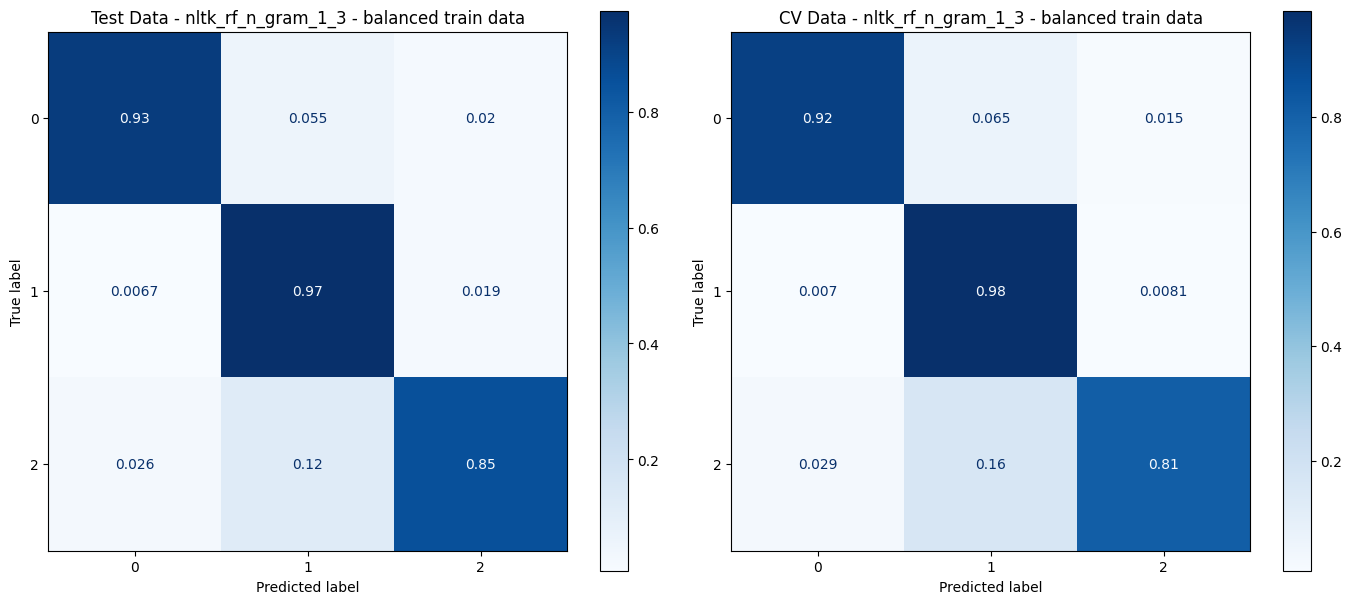

Classification Report for nltk_rf_n_gram_1_3 - balanced train data:
              precision    recall  f1-score   support

    negative       0.93      0.93      0.93      1096
     neutral       0.90      0.97      0.93      2844
    positive       0.96      0.85      0.90      2155

    accuracy                           0.92      6095
   macro avg       0.93      0.92      0.92      6095
weighted avg       0.93      0.92      0.92      6095



In [71]:
# nltk_rf_ngram_1_3_model.evaluate(False)
nltk_rf_ngram_1_3_model.evaluate(True)

#### NLTK-NGrams-SVC

In [72]:
from sklearn.svm import SVC
nltk_svc_ngram_1_3_model = utils.CustomPipeline(
    df_tweets,
    FEATURES,
    TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer()),
                ('tfidf', (TfidfVectorizer(ngram_range=(1, 3)))),
            ]), feature) for feature in FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_svc_n_gram_1_3"
)

In [73]:
nltk_svc_ngram_1_3_model.fit(True)
nltk_svc_ngram_1_3_model.fit(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   4.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=12.7min
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   3.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 6.9min


,text
0,$BYND - JPMorgan reels in expectations on Beyo...
1,$CCL $RCL - Nomura points to bookings weakness...
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ..."
3,$ESS: BTIG Research cuts to Neutral https://t....
4,$FNKO - Funko slides after Piper Jaffray PT cu...
...,...
11926,Stocks making the biggest moves midday: TD Ame...
11927,Stocks making the biggest moves premarket: Fit...
11928,Stocks making the biggest moves premarket: Hom...
11929,Stocks making the biggest moves premarket: TD ...


0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
11926     neutral
11927     neutral
11928     neutral
11929     neutral
11930     neutral
Name: label, Length: 11931, dtype: object

array(['neutral', 'negative', 'negative', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

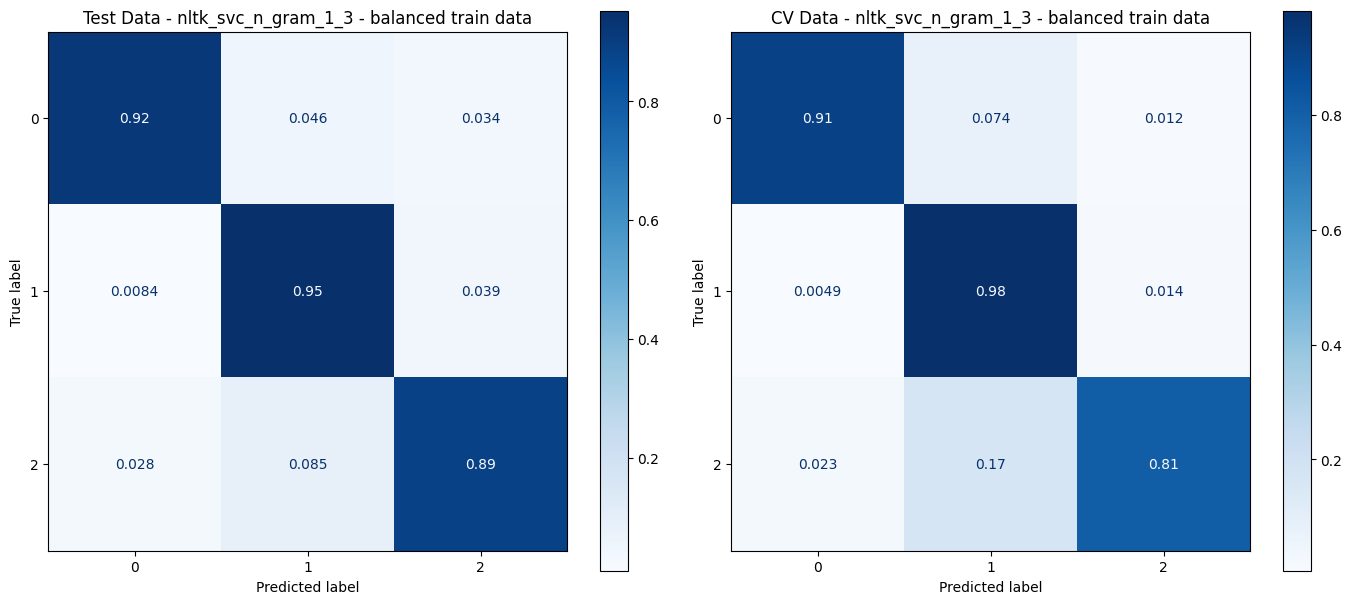

Classification Report for nltk_svc_n_gram_1_3 - balanced train data:
              precision    recall  f1-score   support

    negative       0.92      0.92      0.92      1096
     neutral       0.92      0.95      0.94      2844
    positive       0.93      0.89      0.91      2155

    accuracy                           0.92      6095
   macro avg       0.92      0.92      0.92      6095
weighted avg       0.92      0.92      0.92      6095



In [74]:
# nltk_svc_ngram_1_3_model.evaluate(False)
nltk_svc_ngram_1_3_model.evaluate(True)

In [75]:
nltk_svc_ngram_1_3_model.dump("../res/models")